# HOUSE PRICE PREDICTION

INSTALLING PANDAS

In [3]:
pip install pandas

IMPORTING MODULES 

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

IMPORTING PANDAS AS PD

In [5]:
import pandas as pd

READING DATASET

In [6]:
data = pd.read_csv("Housing.csv")

PRINTING HEAD 

In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


PRINTING INFO

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


TRANSFORMING DATA TYPE

In [9]:
enc = LabelEncoder()

In [10]:
data.mainroad = enc.fit_transform(data.mainroad)
data.guestroom = enc.fit_transform(data.guestroom)
data.basement = enc.fit_transform(data.basement)
data.hotwaterheating = enc.fit_transform(data.hotwaterheating)
data.airconditioning = enc.fit_transform(data.airconditioning)
data.prefarea = enc.fit_transform(data.prefarea)
data.furnishingstatus = enc.fit_transform(data.furnishingstatus)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [12]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [13]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

ASSIGNING  ATTRIBUTES TO VARIABLES X AND Y 


x - training set   
y - testing set

In [14]:
x = data.loc[:,["bedrooms","area","stories","mainroad","furnishingstatus","parking","hotwaterheating","bathrooms","airconditioning","prefarea","basement","guestroom"]]
y = data.loc[:,["price"]]

SPLITTING TRAINING AND TESTING DATA

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

MODEL SELECTION

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

PREDICTION

In [17]:
y_predict= model.predict(x_test)


In [18]:
r2_score(y_test,y_predict)*100

63.92989376868719

In [19]:
train_data=x_train.join(y_train)
train_data

,bedrooms,area,stories,mainroad,furnishingstatus,parking,hotwaterheating,bathrooms,airconditioning,prefarea,basement,guestroom,price
258,3,4040,2,1,1,1,0,1,0,0,0,0,4480000
439,2,3930,1,0,2,0,0,1,0,0,0,0,3255000
185,3,3000,2,1,2,0,0,1,0,0,1,0,5110000
4,4,7420,2,1,0,2,0,1,1,0,1,1,11410000
121,3,7231,2,1,1,0,0,1,1,1,1,1,5950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4,6360,3,1,0,2,0,2,1,1,0,0,7035000
37,4,9000,4,1,0,2,0,2,1,0,0,0,7980000
407,3,2145,3,1,0,0,0,1,0,1,0,0,3465000
156,3,6900,1,1,1,0,0,1,0,1,1,1,5523000


PLOTTING 

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'mainroad'}>],
       [<AxesSubplot:title={'center':'furnishingstatus'}>,
        <AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'hotwaterheating'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'airconditioning'}>,
        <AxesSubplot:title={'center':'prefarea'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'guestroom'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

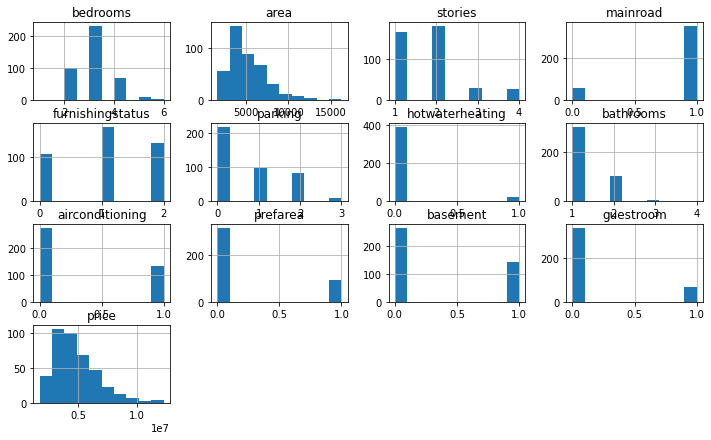

In [20]:
train_data.hist(figsize=(12,7))

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train_data.corr()

,bedrooms,area,stories,mainroad,furnishingstatus,parking,hotwaterheating,bathrooms,airconditioning,prefarea,basement,guestroom,price
bedrooms,1.000000,0.122313,0.405343,-0.079734,-0.141707,0.109791,-0.009782,0.349308,0.163172,0.048055,0.098836,0.093869,0.358037
area,0.122313,1.000000,0.055427,0.272967,-0.198727,0.359019,-0.006005,0.198802,0.222460,0.243697,0.042267,0.148544,0.565853
stories,0.405343,0.055427,1.000000,0.073436,-0.090813,-0.008426,0.022763,0.329865,0.318292,0.040435,-0.151527,0.036185,0.415697
mainroad,-0.079734,0.272967,0.073436,1.000000,-0.136013,0.214246,-0.018362,0.025854,0.138815,0.184404,0.026302,0.101929,0.296365
furnishingstatus,-0.141707,-0.198727,-0.090813,-0.136013,1.000000,-0.185632,-0.048544,-0.137553,-0.165421,-0.089722,-0.133268,-0.130745,-0.306045
parking,0.109791,0.359019,-0.008426,0.214246,-0.185632,1.000000,0.029918,0.155976,0.205657,0.121190,0.085008,0.034317,0.387887
hotwaterheating,-0.009782,-0.006005,0.022763,-0.018362,-0.048544,0.029918,1.000000,-0.026066,-0.123059,-0.032512,-0.008815,-0.032026,0.061453
bathrooms,0.349308,0.198802,0.329865,0.025854,-0.137553,0.155976,-0.026066,1.000000,0.210968,0.041502,0.087766,0.064666,0.494155
airconditioning,0.163172,0.222460,0.318292,0.138815,-0.165421,0.205657,-0.123059,0.210968,1.000000,0.106855,0.070293,0.154638,0.458714
prefarea,0.048055,0.243697,0.040435,0.184404,-0.089722,0.121190,-0.032512,0.041502,0.106855,1.000000,0.204911,0.177009,0.339720


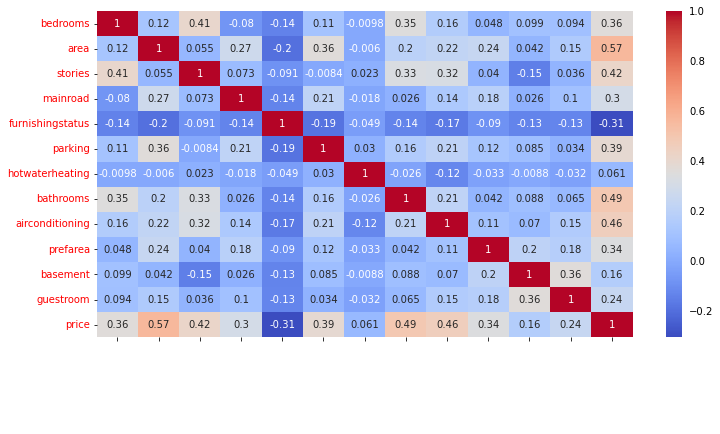

In [64]:
plt.figure(figsize=(12,6))
heatmap =sns.heatmap(train_data.corr(),annot=True,cmap="coolwarm")
plt.xticks(color='white')
plt.yticks(color='red')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')

plt.show()